In [1]:
from __future__ import print_function
from __future__ import division
from keras.models import Sequential, model_from_json
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

from lib.pretty_testing import predict_test
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

Using TensorFlow backend.


In [2]:
top_words = 5000
embedding_vector_length = 32
maxlen = 100
epochs = 20
classes = ['poteri', 'scadenza', 'assemblea', 'clausola', 'non_riconducibile']

In [3]:
# load prepared data
with open('../extraction/dataset.p') as f:
    data, labels = pickle.load(f)

In [4]:
padded_data = sequence.pad_sequences(data, maxlen, padding="pre", truncating="post", value=0, dtype='uint32')
labels = np.array(labels)

In [5]:
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=maxlen, mask_zero=True))
model.add(LSTM(32, dropout=0.2))
model.add(Dense(len(classes), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 168,485
Trainable params: 168,485
Non-trainable params: 0
_________________________________________________________________


In [6]:
X_train, X_test, y_train, y_test = train_test_split(padded_data, labels, train_size=0.9, stratify=labels)
y_train_cat = to_categorical(y_train, num_classes=len(classes))
y_test_cat = to_categorical(y_test, num_classes=len(classes))

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
[l.get_weights()[0].shape for l in model.layers]

[(5000, 32), (32, 128), (32, 5)]

In [8]:
h = model.fit(X_train,  y_train_cat, epochs=epochs, batch_size=32, verbose=0)
h.history

{'categorical_accuracy': [0.61764705882352944,
  0.64856711942505874,
  0.66742081474934234,
  0.73378582229082046,
  0.81523378564221827,
  0.86123680241327305,
  0.87405731496408157,
  0.88386123680241324,
  0.90271493212669685,
  0.92156862718127608,
  0.95022624416408852,
  0.97209653092006032,
  0.97435897435897434,
  0.97888386096709812,
  0.95475113122171951,
  0.97963800904977372,
  0.9773755656108597,
  0.98567119155354455,
  0.98491704374057321,
  0.98717948690978286],
 'loss': [1.4055968781941617,
  1.0831057480557471,
  0.89607109698055376,
  0.71155703319503527,
  0.55825173072685486,
  0.40504027387270558,
  0.32607907348988102,
  0.27740407446301002,
  0.23588556506380237,
  0.21841068732163127,
  0.17782971671983308,
  0.14115346119729283,
  0.12362834447109861,
  0.095812014392598177,
  0.16785526786387236,
  0.085015177108673304,
  0.078531105459006129,
  0.071829375275726776,
  0.063006109306602817,
  0.053079789389222636]}

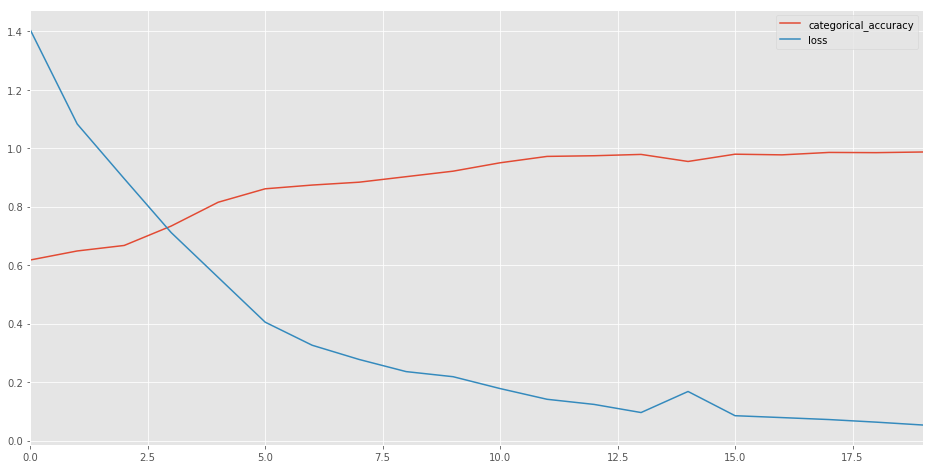

In [9]:
df = pd.DataFrame(h.history)
df.plot(figsize=(16,8))

In [10]:
predict_test(model, X_test, y_test, classes)

()
Test classification report
Accuracy: 0.750000
             precision    recall  f1-score   support

          0       0.62      0.59      0.60        22
          1       0.00      0.00      0.00         1
          2       0.40      0.33      0.36        12
          3       0.78      0.82      0.80        17
          4       0.81      0.83      0.82        96

avg / total       0.74      0.75      0.74       148

Test confusion Matrix
                                 poteri          scadenza         assemblea          clausola non_riconducibile
               poteri              13.0               0.0               0.0               0.0               9.0
             scadenza               0.0               0.0               0.0               0.0               1.0
            assemblea               1.0               0.0               4.0               1.0               6.0
             clausola               0.0               0.0               0.0              14.0              

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.75